In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn. import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
credit=pd.read_csv('GermanCredit.csv')

In [3]:
credit.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Creditability               1000 non-null int64
CreditAmount                1000 non-null int64
DurationOfCreditInMonths    1000 non-null int64
dtypes: int64(3)
memory usage: 23.5 KB


In [5]:
credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Creditability,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
CreditAmount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
DurationOfCreditInMonths,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [6]:
credit.shape

(1000, 3)

In [7]:
credit[credit['Creditability'] == np.NaN]

,Creditability,CreditAmount,DurationOfCreditInMonths


In [8]:
credit[credit['CreditAmount'] == np.NaN]

,Creditability,CreditAmount,DurationOfCreditInMonths


In [9]:
credit[credit['DurationOfCreditInMonths'] == np.NaN]

,Creditability,CreditAmount,DurationOfCreditInMonths


In [10]:
#credit.rename(columns={'DurationOfCreditInMonths':'CreditDuration'})

In [11]:
#credit['CreditAmount'].replace(np.NAN,0)

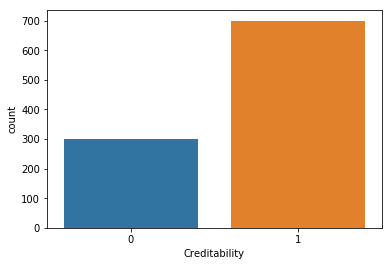

In [59]:
sns.countplot(credit['Creditability'])

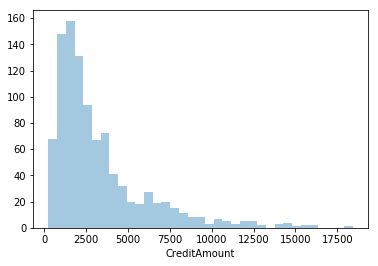

In [61]:
sns.distplot(credit['CreditAmount'], kde=False)

In [12]:
X=credit.drop(axis=1, columns ='Creditability')

In [13]:
X.head()

,CreditAmount,DurationOfCreditInMonths
0,1049,18
1,2799,9
2,841,12
3,2122,12
4,2171,12


In [14]:
y=credit['Creditability']

In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Creditability, dtype: int64

In [16]:
credit.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [20]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 731 to 37
Data columns (total 2 columns):
CreditAmount                700 non-null int64
DurationOfCreditInMonths    700 non-null int64
dtypes: int64(2)
memory usage: 16.4 KB


In [28]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 507 to 349
Data columns (total 2 columns):
CreditAmount                300 non-null int64
DurationOfCreditInMonths    300 non-null int64
dtypes: int64(2)
memory usage: 7.0 KB


In [31]:
y_train.describe()

count    700.000000
mean       0.701429
std        0.457959
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Creditability, dtype: float64

In [32]:
y_test.describe()

count    300.000000
mean       0.696667
std        0.460466
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Creditability, dtype: float64

In [33]:
credit_LR = LogisticRegression()

In [35]:
credit_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
predict=credit_LR.predict(X_test)

In [42]:
credit_LR.score(X_test,y_test)

0.69

In [43]:
credit_LR.score(X_train,y_train)

0.7157142857142857

In [57]:
confusion_matrix(predict,y_test)

array([[  9,  11],
       [ 82, 198]], dtype=int64)

In [50]:
y.dtype

dtype('int64')

In [51]:
y.data

C:\Smita\AIML\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


<read-write buffer for 0x000000000BC6B030, size 8000, offset 0 at 0x000000000C03F768>

In [54]:
y.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [56]:
y_test.value_counts()

1    209
0     91
Name: Creditability, dtype: int64